# Import Library

In [6]:
import pandas as pd
import numpy as na
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

# Input File

In [7]:
Housing = pd.read_csv('HousingFinance1.csv')
Housing.dtypes
Housing.head()

,ID,Decision,Build_Selfcon,Marital_Status,Employer_Type,OldEmi_d,BankSave_d,Age,YrsAdd,YrsJob,TotInc,MarVal,LoanReq,Term,CalcEmi,IIR,IAR,OldEmi,LTV,FOIR
0,AJM-39R8-519413,0,Self Contruction,Married,Business,1,0,31,25,4,51090,500000,200000,84,4087.159912,7.999922,11.000000,7306,40.000000,22.300176
1,AJM-3A3Z-876970,0,Self Contruction,Married,Ind/SmallBus,1,0,41,2,15,22386,450704,320000,180,4924.810059,21.999509,38.999129,2431,71.000035,32.858975
2,AJM-7427-952085,1,Self Contruction,Married,Ind/SmallBus,0,0,51,9,8,32536,2777778,500000,84,11712.969730,36.000030,56.000047,0,17.999999,36.000030
3,AJM-8ZTZ-979040,1,Self Contruction,Married,Business,0,0,26,2,6,41595,1785714,1000000,180,15390.040040,36.999736,52.999656,0,56.000009,36.999736
4,AJM-9SP2-614810,1,Self Contruction,Married,Business,0,0,31,30,15,37537,1960784,1000000,180,15390.040040,40.999654,57.000148,0,51.000008,40.999654


In [8]:
Housing.isna().sum()

ID                0
Decision          0
Build_Selfcon     0
Marital_Status    0
Employer_Type     0
OldEmi_d          0
BankSave_d        0
Age               0
YrsAdd            0
YrsJob            0
TotInc            0
MarVal            0
LoanReq           0
Term              0
CalcEmi           0
IIR               0
IAR               0
OldEmi            0
LTV               0
FOIR              0
dtype: int64

In [9]:
Housing.describe()

,Decision,OldEmi_d,BankSave_d,Age,YrsAdd,YrsJob,TotInc,MarVal,LoanReq,Term,CalcEmi,IIR,IAR,OldEmi,LTV,FOIR
count,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1.570000e+03,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000
mean,0.799363,0.129936,0.119745,37.755414,9.840764,10.929299,29773.247134,1.177865e+06,593114.883439,160.135669,9614.650270,35.491610,64.426409,770.103185,56.553662,37.364287
std,0.400605,0.336340,0.324767,8.410670,10.481894,7.986092,18064.471699,6.553948e+05,237395.064240,36.976144,3633.136794,10.550461,21.454229,3101.888861,22.090929,10.651161
min,0.000000,0.000000,0.000000,22.000000,0.000000,0.000000,7000.000000,5.996000e+04,76000.000000,15.000000,960.130005,4.000042,4.999896,0.000000,4.000000,4.000042
25%,1.000000,0.000000,0.000000,31.000000,2.000000,4.000000,18773.250000,7.897618e+05,400000.000000,168.000000,6790.857544,28.000223,48.989497,0.000000,42.000008,30.000096
50%,1.000000,0.000000,0.000000,37.000000,5.000000,10.000000,25127.000000,1.072752e+06,600000.000000,180.000000,9234.030273,36.000089,66.998592,0.000000,56.999999,38.000842
75%,1.000000,0.000000,0.000000,43.000000,15.000000,15.000000,35237.500000,1.403509e+06,800000.000000,180.000000,12312.030270,43.999994,81.999840,0.000000,71.000027,46.000369
max,1.000000,1.000000,1.000000,63.000000,61.000000,60.000000,219858.000000,7.272727e+06,1000000.000000,180.000000,19882.060550,65.000634,99.999126,40000.000000,222.222222,73.250858


# Convert Binary Variable

In [10]:
Housing['Marital_Status'].replace({'Married':1,'Unmarried':0},inplace=True)

### Create Dummy Variable

In [11]:
Dummy = pd.get_dummies(Housing['Employer_Type'])
Dummy1 = pd.get_dummies(Housing['Build_Selfcon'])
Housing = pd.concat([Housing,Dummy,Dummy1],axis=1)

In [12]:
Housing.head()

,ID,Decision,Build_Selfcon,Marital_Status,Employer_Type,OldEmi_d,BankSave_d,Age,YrsAdd,YrsJob,...,IAR,OldEmi,LTV,FOIR,Business,Corporate,Govt,Ind/SmallBus,Builder,Self Contruction
0,AJM-39R8-519413,0,Self Contruction,1,Business,1,0,31,25,4,...,11.000000,7306,40.000000,22.300176,1,0,0,0,0,1
1,AJM-3A3Z-876970,0,Self Contruction,1,Ind/SmallBus,1,0,41,2,15,...,38.999129,2431,71.000035,32.858975,0,0,0,1,0,1
2,AJM-7427-952085,1,Self Contruction,1,Ind/SmallBus,0,0,51,9,8,...,56.000047,0,17.999999,36.000030,0,0,0,1,0,1
3,AJM-8ZTZ-979040,1,Self Contruction,1,Business,0,0,26,2,6,...,52.999656,0,56.000009,36.999736,1,0,0,0,0,1
4,AJM-9SP2-614810,1,Self Contruction,1,Business,0,0,31,30,15,...,57.000148,0,51.000008,40.999654,1,0,0,0,0,1


# Feature Selection

In [13]:
list(Housing.columns)

['ID',
 'Decision',
 'Build_Selfcon',
 'Marital_Status',
 'Employer_Type',
 'OldEmi_d',
 'BankSave_d',
 'Age',
 'YrsAdd',
 'YrsJob',
 'TotInc',
 'MarVal',
 'LoanReq',
 'Term',
 'CalcEmi',
 'IIR',
 'IAR',
 'OldEmi',
 'LTV',
 'FOIR',
 'Business',
 'Corporate',
 'Govt',
 'Ind/SmallBus',
 'Builder',
 'Self Contruction']

In [14]:
corrmat = Housing.corr()

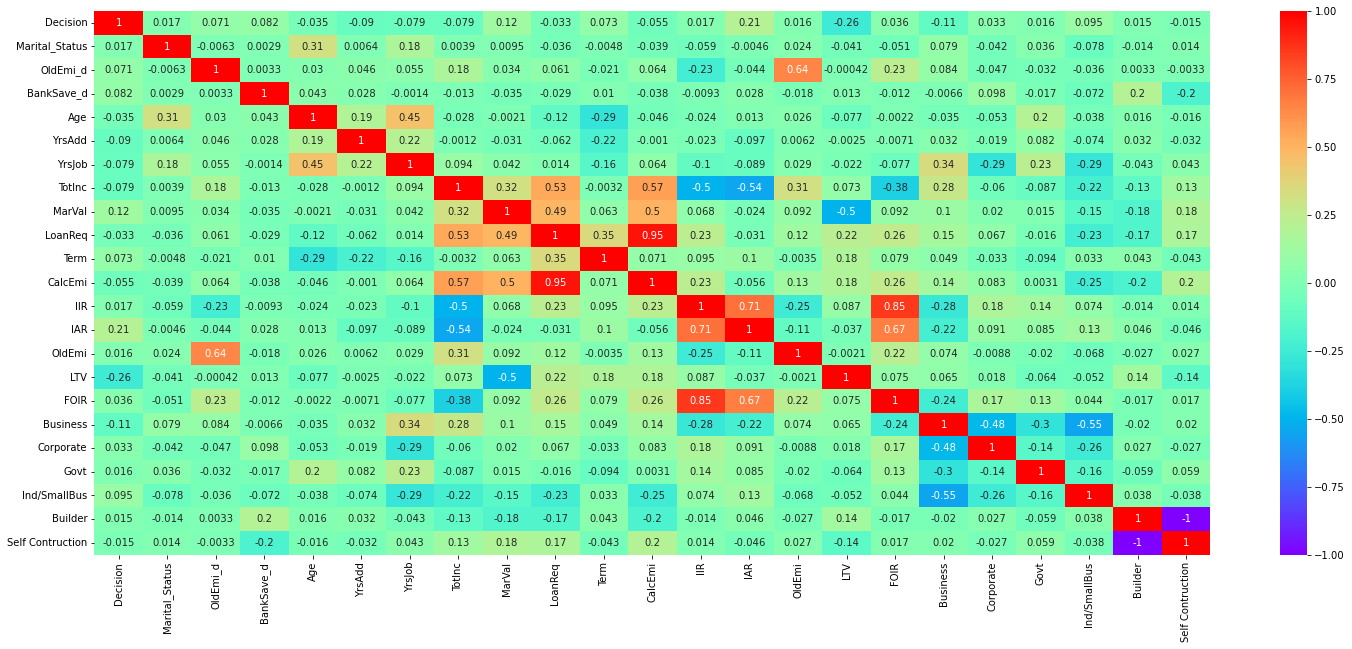

In [15]:
plt.figure(figsize = (25,10))
sns.heatmap(corrmat, annot = True, cmap="rainbow")
plt.show()

In [16]:
Col = ['OldEmi_d',
 'BankSave_d',
 'Age',
 'YrsAdd',
 'YrsJob',
 'TotInc',
 'MarVal',
 'LoanReq',
 'Term',
 'CalcEmi',
 'IIR',
 'IAR',
 'OldEmi',
 'LTV',
 'FOIR',
 'Business',
 'Corporate',
 'Govt',
 'Ind/SmallBus',
 'Marital_Status',
 'Builder',
 'Self Contruction']
X= Housing[Col]
y= Housing.Decision
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Building Decision Tree

In [39]:
clf = DecisionTreeClassifier(criterion='entropy',max_depth=2,min_samples_split=2)

In [40]:
#clf = DecisionTreeClassifier()

In [43]:
model=clf.fit(x_train,y_train)
model

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [44]:
y_pred = model.predict(x_test)

In [45]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8152866242038217


# Draw Tree

In [22]:
#pip install pydotplus
#pip install graphviz
#pip install pyparsing

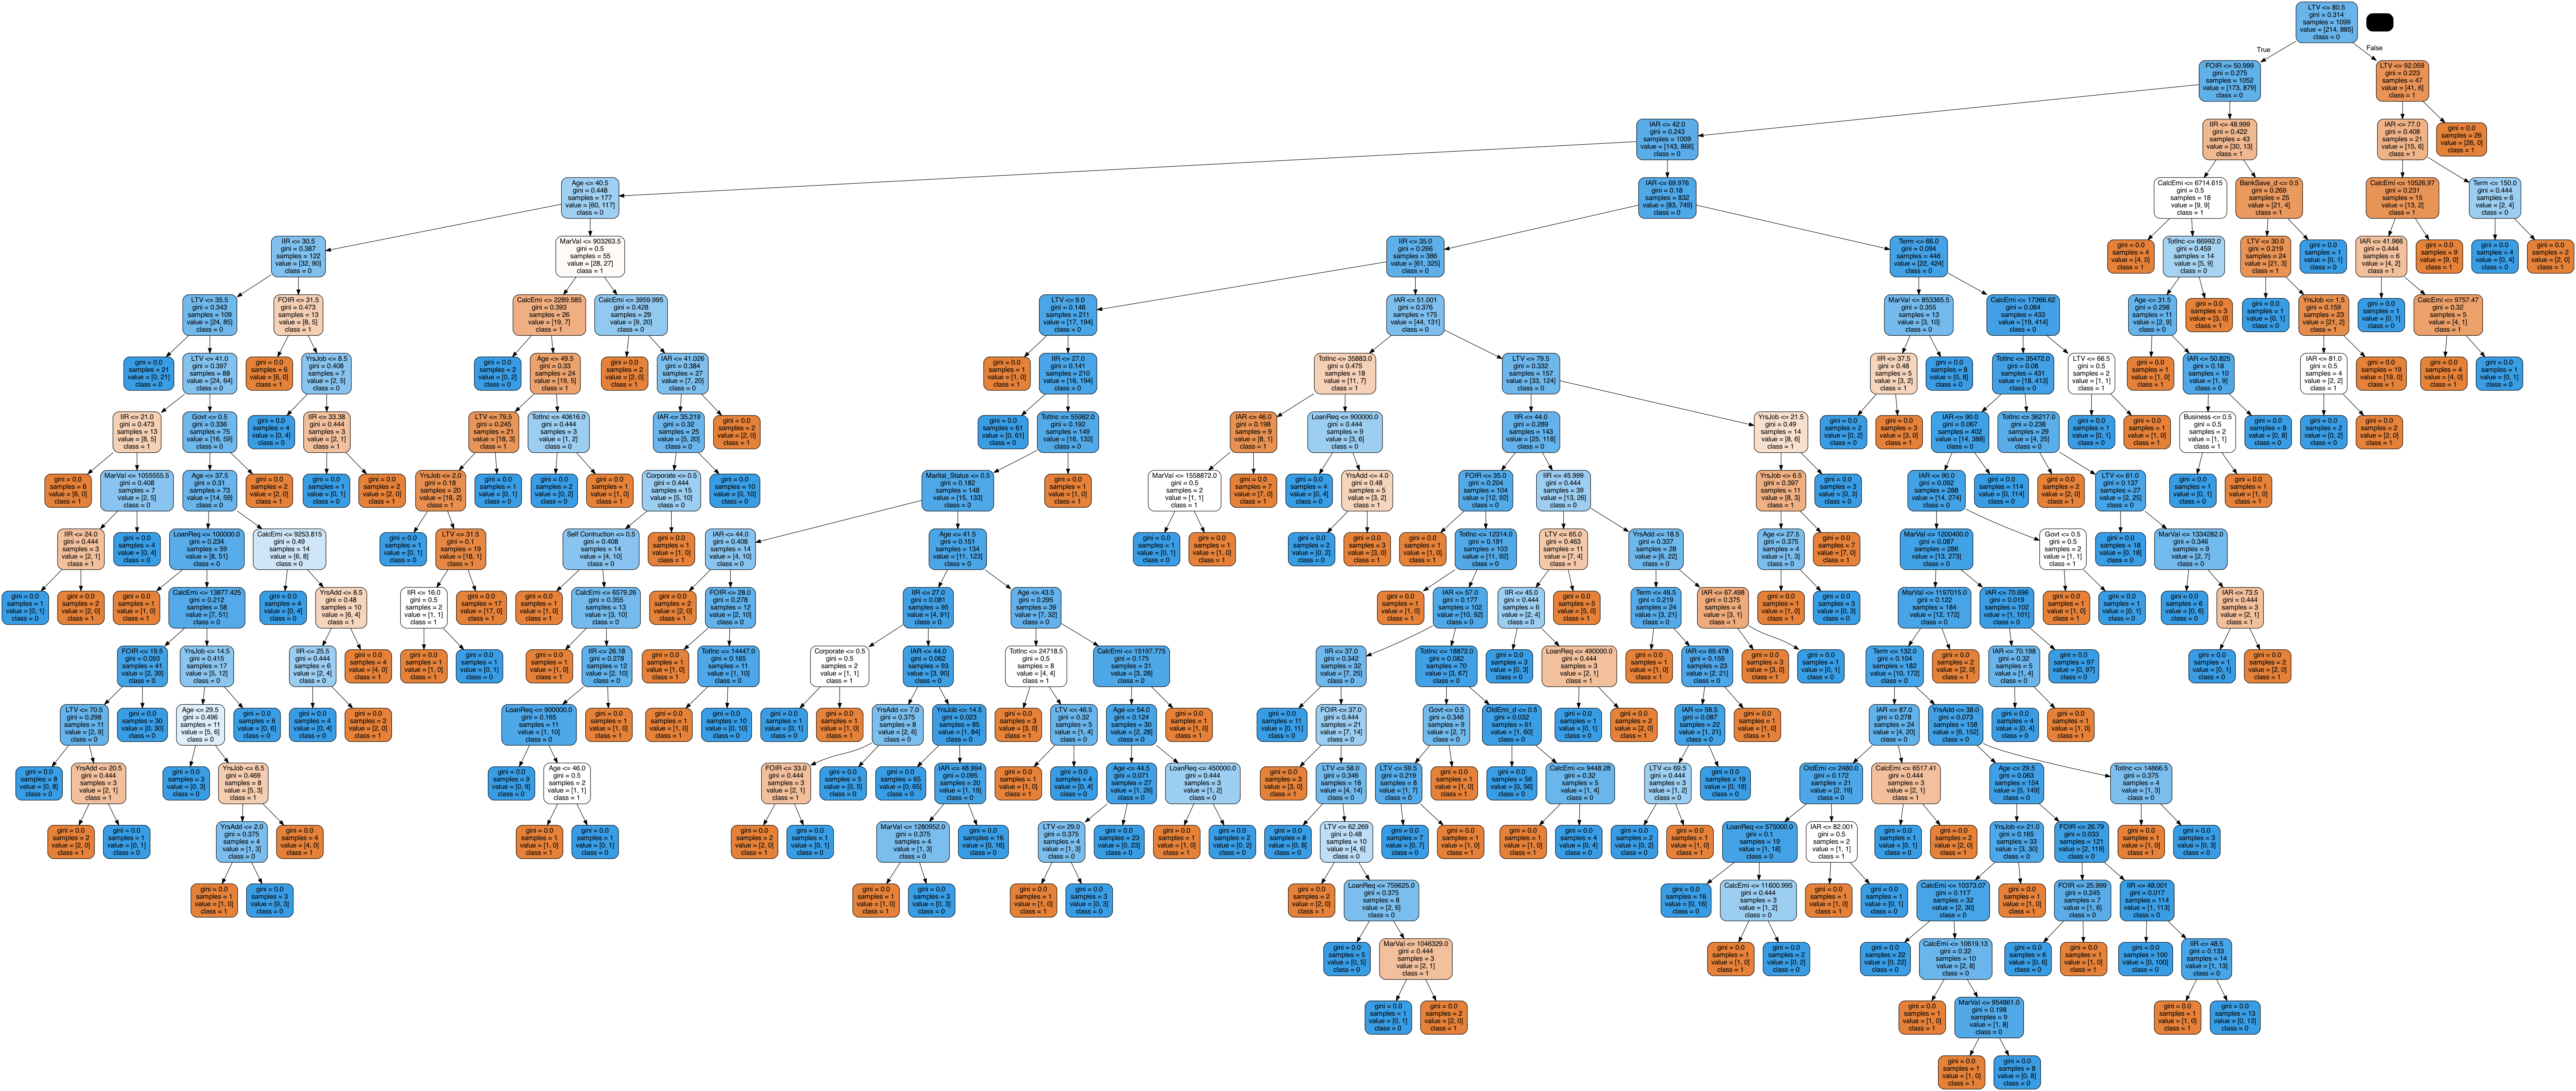

In [24]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
from IPython.display import Image

dot_data=export_graphviz(clf,filled=True,rounded=True,feature_names=Col,class_names=['1','0'],out_file=None)
graph=graph_from_dot_data(dot_data)
graph.write_png('clf.png')
Image(graph.create_png())

In [25]:
from sklearn import tree
text_representation = tree.export_text(clf, feature_names=Col)
print(text_representation)

|--- LTV <= 80.50
|   |--- FOIR <= 51.00
|   |   |--- IAR <= 42.00
|   |   |   |--- Age <= 40.50
|   |   |   |   |--- IIR <= 30.50
|   |   |   |   |   |--- LTV <= 35.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- LTV >  35.50
|   |   |   |   |   |   |--- LTV <= 41.00
|   |   |   |   |   |   |   |--- IIR <= 21.00
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- IIR >  21.00
|   |   |   |   |   |   |   |   |--- MarVal <= 1055555.50
|   |   |   |   |   |   |   |   |   |--- IIR <= 24.00
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- IIR >  24.00
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- MarVal >  1055555.50
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- LTV >  41.00
|   |   |   |   |   |   |   |--- Govt <= 0.50
|   |   |   |   |   |   |   |   |--- Age <= 37.50
|   |   |   |   |   |   |   |   |   |--- LoanReq <= 100

# CONFUSION MATRIX

In [26]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7409766454352441


In [27]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 41,  60],
       [ 62, 308]])

Text(0.5, 15.0, 'Predicted label')

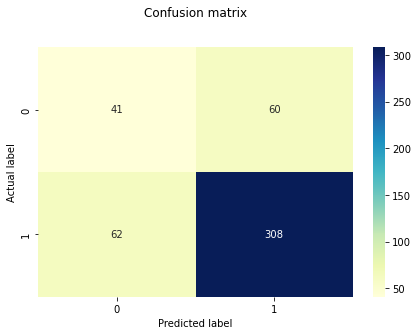

In [28]:
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu",fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Hyperparameter Tuning

In [33]:
parameter = {"criterion":["entropy","gini"],
            "max_depth":[1,2,3,4,5,6,7,None],
            "min_samples_split":[1,2,3,4,5,6,7,8,9,10]}

In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
grid = GridSearchCV(clf,param_grid=parameter,cv=10)

In [36]:
grid.fit(x_train,y_train)

/Users/alekhgour/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
160 fits failed out of a total of 1600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
160 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/alekhgour/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/alekhgour/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 937, in fit
    super().fit(
  File "/Users/alekhgour/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 250, in fit
    raise ValueError(
ValueError: m

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, None],
                         'min_samples_split': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [37]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 2, 'min_samples_split': 2}

In [38]:
grid.best_score_

0.8453628023352794